In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## Simulando una moneda: dos formas


# Simulación 1
La primera simulacion consiste en emplear las proporciones de las distribuciones teóricas o esperadas y elegir 

In [63]:
prop = make_array(0.5,0.5)
sample_size = 100
sample_proportions(sample_size , prop).item(0)

0.46

In [64]:
def simulated():
    sample_size = 100
    return 100*sample_proportions(sample_size , prop).item(0)

In [65]:
lanzamientos = make_array()
for i in range(0, 10000):
    lanzamientos=np.append(lanzamientos,simulated())

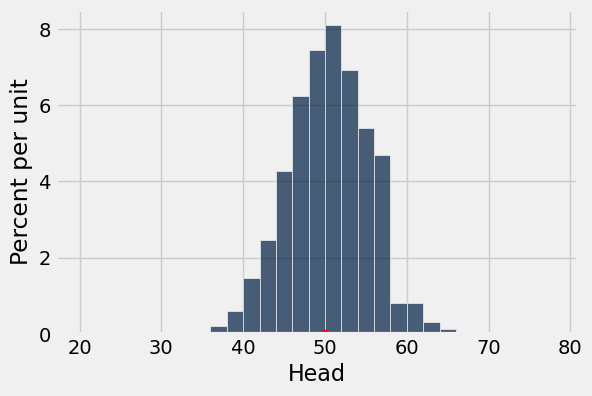

In [66]:
Table().with_column("Head", lanzamientos).hist(bins=np.arange(20, 80, 2))
plots.plot(50, 0, "ro")

### 

# Simulación 2
la segunda simulacion consiste en hacer el experimentos eligiendo cara o sello desde un arreglo de datos

In [ ]:
def simulated2():
    moneda = make_array("head", "tail")
    eleccion = np.random.choice(moneda, 100)
    return np.count_nonzero(eleccion=="head")
simulated2()

# Dados 

En 100 lanzamientos, ¿cuantas veces sale en el número uno?

In [68]:
prop = make_array(1/6,1/6,1/6,1/6,1/6,1/6)

In [73]:
def simulated():
    prop = make_array(1/6,1/6,1/6,1/6,1/6,1/6)
    return 100*sample_proportions(100, prop).item(1)

In [76]:
dados_unos=make_array()
for i in range(0,100000):
    dados_unos = np.append(dados_unos, simulated())


array([ 18.,  21.,  19., ...,  17.,  16.,  19.])

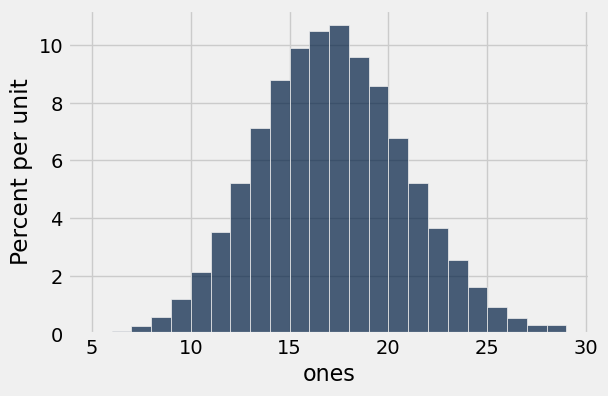

In [83]:
unos = Table().with_columns("ones", dados_unos)
unos.hist(bins=np.arange(5,30,1))

In [80]:
np.mean(dados_unos)

16.660340000000001

# Seleccion de jurados en 1960 estados unidos:


En EE. UU., los jurados son seleccionados de la población adulta a partir de listas oficiales. En la década de 1960, la lista de jurados en Alabama se basaba en:

- Registro de votantes (principal fuente de selección).
- Listas de contribuyentes de impuestos en algunos condados.


"En todos los procesos penales, los acusados tendrán derecho a un juicio rápido y público, por un jurado imparcial del Estado y distrito en el que se haya cometido el delito".

Jurado imparcial: Debe ser seleccionado de un panel de jurado (Grupo de personas elegibles para ser seleccionadas) que sea representativo de la población de la región relevante. 
Jurado Juicio final: El jurado del juicio final se selecciona entre ellos por inclusión o exclusión deliberada.





# Discriminación en la selección de jurados


Lugar: Talladega, Alabama.
Fecha: 1962.
Acusado: Robert Swain, un hombre negro.
Cargo: Violación.



En 1962, Robert Swain, un hombre negro, fue condenado por violación en el condado de Talladega, Alabama. Swain apeló su condena hasta la Corte Suprema de los Estados Unidos, argumentando que los negros habían sido sistemáticamente excluidos de los jurados en su condado. En el momento del juicio, el 26 % de los hombres elegibles para servir en jurados en el condado de Talladega eran negros. Sin embargo, en el panel de 100 hombres del que se seleccionó el jurado para su juicio, solo 8 eran negros, representando apenas el 8 %. Swain también presentó evidencia de que durante los últimos 10 años, los paneles de jurados en el condado mostraban una representación consistentemente baja de hombres negros. A pesar de esto, la Corte Suprema rechazó la apelación, declarando que "la disparidad porcentual general ha sido pequeña" dado que la seleccion es **completamente aleatoria**


Si la selección del panel de jurados hubiera sido **completamente aleatoria**, ¿cuál sería la probabilidad de obtener solo 8 hombres negros en un panel de 100, dado que el 26 % de la población elegible era negra?

In [87]:
prop = make_array(0.26, 0.74)

In [112]:
def simulated():
    return 100*sample_proportions(100, prop).item(0)

In [113]:
counts = make_array()
for i in range(0, 10000):
    counts=np.append(counts,simulated())

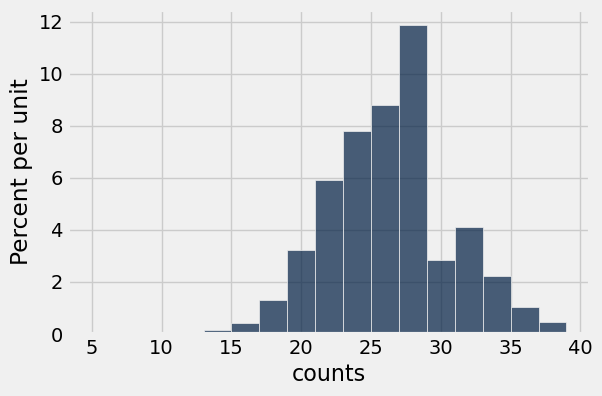

In [114]:
Table().with_column("counts", counts).hist(bins=np.arange(5,41, 2))

In [107]:
np.arange(5,40, 2)

array([ 5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37,
       39])

In [176]:
sample_size = 100
eligible_population = [0.26, 0.74] # Suponer un 26% de la población
sample_proportions(sample_size, eligible_population)

array([ 0.25,  0.75])

In [177]:
# Conteo de la poblacion en numero de personas
def one_simulated_count():
    return sample_size * sample_proportions(sample_size, eligible_population).item(0)

In [178]:
one_simulated_count()

24.0

# Simulando multiples valores en la estadistica

In [179]:
counts =  make_array()
repetitions = 10000
for i in np.arange(repetitions):
    counts = np.append(counts, one_simulated_count())

In [180]:
counts

array([ 31.,  24.,  20., ...,  28.,  31.,  34.])

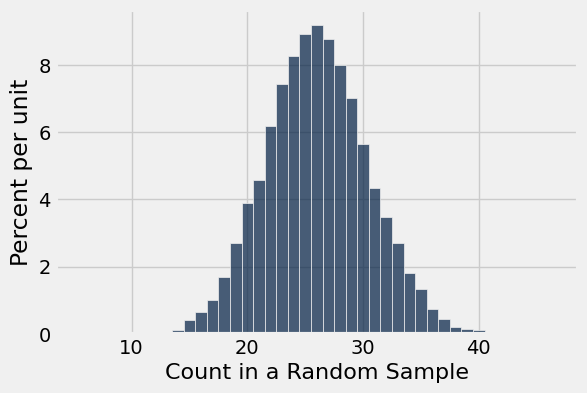

In [181]:
Table().with_column(
    'Count in a Random Sample', counts
).hist(bins = np.arange(5.5, 46.6, 1))

Grafiquemos la población : 

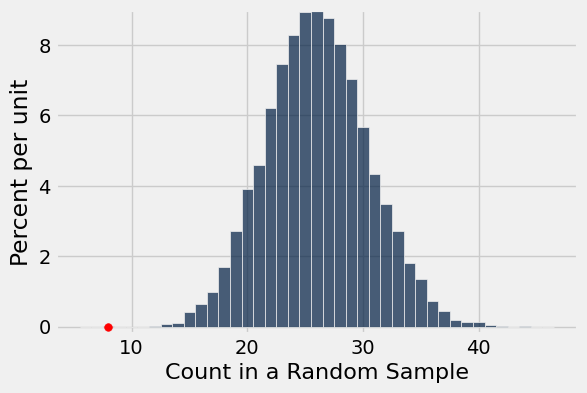

In [182]:
Table().with_column(
    'Count in a Random Sample', counts
).hist(bins = np.arange(5.5, 46.6, 1))
plots.ylim(-0.002, 0.09)
plots.scatter(8, 0, color='red', s=30);

El gráfico anterior es una representación visual del sesgo en el proceso de selección. Muestra que si seleccionamos un panel de tamaño 100 al azar de la población elegible, es muy poco probable que obtengamos recuentos de panelistas negros que sean tan bajos como los ocho que se observaron en el panel en el ensayo.

- Se le negó el jurado imparcial al que tenía derecho los Estados Unidos. Constitución


**Definición Sesgo**: 
En estadística, el sesgo se refiere a la diferencia sistemática entre el valor esperado de un estimador y el valor verdadero del parámetro que se está estimando. Es un error que no se debe al azar,  

# Otro estudio de caso 


##  ¿Qué es un Jurado en Estados Unidos?

En Estados Unidos, muchos juicios (especialmente los penales) son decididos por un jurado. Un jurado es un grupo de ciudadanos comunes que escuchan el caso y deciden si el acusado es culpable o inocente.

## Diferencia Entre Personas Elegibles y Seleccionadas(Paneles):

a) Personas Elegibles:

Son todas las personas que cumplen con ciertos requisitos legales para poder ser parte de un jurado. Requisitos típicos para ser elegible:
- Ser ciudadano estadounidense.
- Tener más de 18 años.
- No tener antecedentes penales graves.
- Vivir en el área donde se lleva a cabo el juicio.

Ejemplo:

Imagina que en un condado hay 1,000 personas que cumplen estos requisitos. Entre ellas, el 18% son afroamericanos, el 15% son asiáticos, el 54% son caucásicos, etc. Estas son las personas elegibles para formar parte de un jurado.


### Caso
- Se supone que el panel del jurado es representativo de la población de miembros del jurado elegibles.  En 2010, la Unión Americana de Libertades Civiles ACLU recopiló datos sobre la composición de los paneles del jurado en 11 juicios por delitos graves en el condado de Alameda en los años 2009 y 2010.


# Composición de las muestras

-  1453 personas selecionadas al azar de diferente composicion racial y étnica.
-  La tabla es mostrada a continuación:

In [116]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian/PI', 'Black/AA', 'Caucasian', 'Hispanic', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.54, 0.12, 0.01),
    'Panels', make_array(0.26, 0.08, 0.54, 0.08, 0.04)
)
jury

Ethnicity,Eligible,Panels
Asian/PI,0.15,0.26
Black/AA,0.18,0.08
Caucasian,0.54,0.54
Hispanic,0.12,0.08
Other,0.01,0.04


La tabla anterior quiere decir que de la poblacion total para ser elegida se tomo una muestra de 1453 personas, distribuidas como muestra la colimna Panels de la tabla anterior.

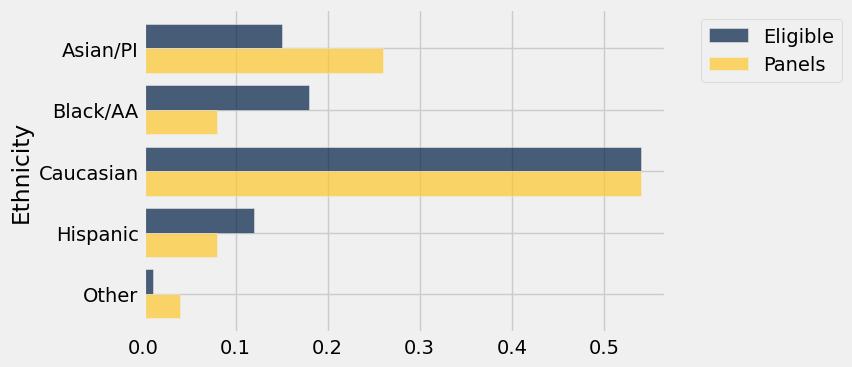

In [117]:
jury.barh('Ethnicity')

# Realicemos el experimento sobre 1453 personas

In [118]:
eligible_population = jury.column('Eligible')
eligible_population

array([ 0.15,  0.18,  0.54,  0.12,  0.01])

In [119]:
sample_distribution = sample_proportions(1453, eligible_population)
panels_and_sample = jury.with_column('Random Sample', sample_distribution)
panels_and_sample

Ethnicity,Eligible,Panels,Random Sample
Asian/PI,0.15,0.26,0.162423
Black/AA,0.18,0.08,0.198211
Caucasian,0.54,0.54,0.504474
Hispanic,0.12,0.08,0.121817
Other,0.01,0.04,0.0130764


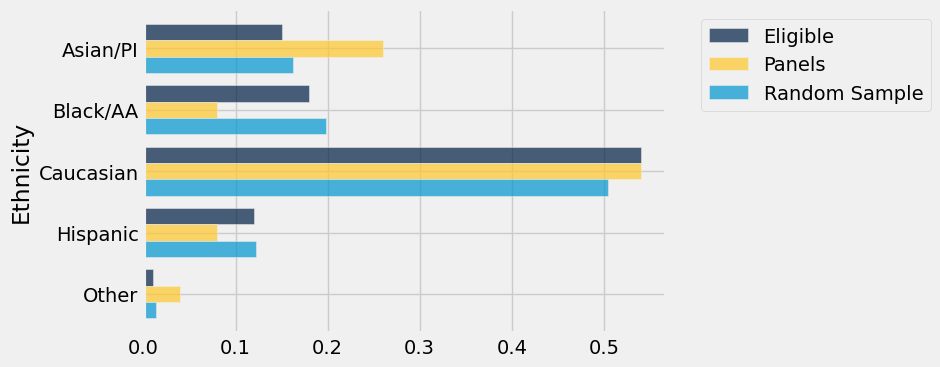

In [120]:
panels_and_sample.barh('Ethnicity')

¿La muestra panels es elegida completamente de forma aleatoría?

# Una nueva estadística: la distancia entre dos distribuciones

¿Cuál es la distancia entre las distribución azul y la distribución amarilla?

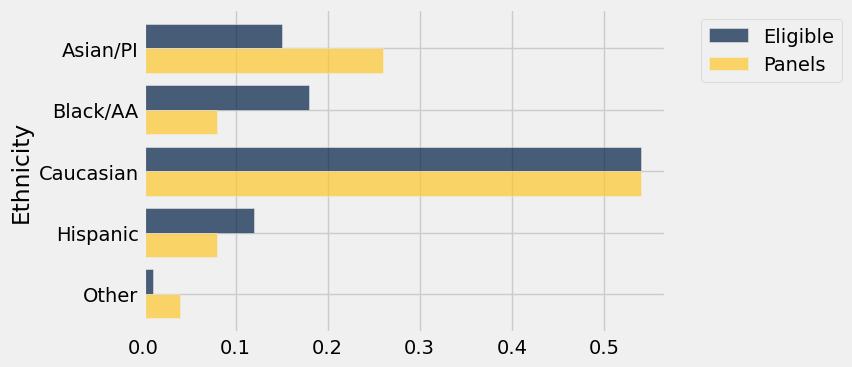

In [121]:
jury.barh('Ethnicity')

Para esto calcularemos una cantidad llamada distancia de variación total entre dos distribuciones. El cálculo es como una extensión de cómo encontramos la distancia entre dos números.

Para calcular la distancia de variación total, primero encontramos la diferencia entre las dos proporciones en cada categoría.

In [122]:
# Augment the table with a column of differences between proportions

jury_with_diffs = jury.with_column(
    'Difference', jury.column('Panels') - jury.column('Eligible')
)
jury_with_diffs

Ethnicity,Eligible,Panels,Difference
Asian/PI,0.15,0.26,0.11
Black/AA,0.18,0.08,-0.1
Caucasian,0.54,0.54,0
Hispanic,0.12,0.08,-0.04
Other,0.01,0.04,0.03


# Distancia total de variación (TVD):
\begin{equation}
TVD =  \frac{1}{2} \sum |P-Q| 
\end{equation}

- La suma es realizada sobre todos los eventos
- P(x) probabilidad de un evento 
- Q(x) probablidad de un segundo evento

- TVD = 0, Las dos distribuciones son idénticas.
- TVD = 1, Las dos distribuciones son diferentes.

In [124]:
jury_with_diffs = jury_with_diffs.with_column(
    'Absolute Difference', np.abs(jury_with_diffs.column('Difference'))
)
jury_with_diffs

Ethnicity,Eligible,Panels,Difference,Absolute Difference
Asian/PI,0.15,0.26,0.11,0.11
Black/AA,0.18,0.08,-0.1,0.1
Caucasian,0.54,0.54,0,0
Hispanic,0.12,0.08,-0.04,0.04
Other,0.01,0.04,0.03,0.03


In [126]:
jury_with_diffs.column('Absolute Difference').sum() / 2

0.14000000000000001

In [127]:
# Otra forma de calcularla
def total_variation_distance(distribution_1, distribution_2):
    return sum(np.abs(distribution_1 - distribution_2)) / 2
    
total_variation_distance(jury.column('Panels'), jury.column('Eligible'))

0.14000000000000001

# Sobre una muestra aleatoria, tenemos: 

In [128]:
sample_distribution = sample_proportions(1453, eligible_population)
panels_and_sample = jury.with_column('Random Sample', sample_distribution)
panels_and_sample

Ethnicity,Eligible,Panels,Random Sample
Asian/PI,0.15,0.26,0.133517
Black/AA,0.18,0.08,0.165864
Caucasian,0.54,0.54,0.57605
Hispanic,0.12,0.08,0.116311
Other,0.01,0.04,0.00825877


In [129]:
total_variation_distance(sample_distribution, eligible_population)

0.036049552649690252

# Simulando un valor estadistico 


In [130]:
# Simulate one simulated value of 
# the total variation distance between
# the distribution of a sample selected at random
# and the distribution of the eligible population

def one_simulated_tvd():
    sample_distribution = sample_proportions(1453, eligible_population)
    return total_variation_distance(sample_distribution, eligible_population) 
one_simulated_tvd()

0.002174810736407475

## Simulando múltiples valores 

In [131]:
tvds = make_array()
repetitions = 5000
for i in np.arange(repetitions):
    tvds = np.append(tvds, one_simulated_tvd())

In [132]:
tvds

array([ 0.02264281,  0.0173159 ,  0.01108741, ...,  0.03847213,
        0.029298  ,  0.01112182])

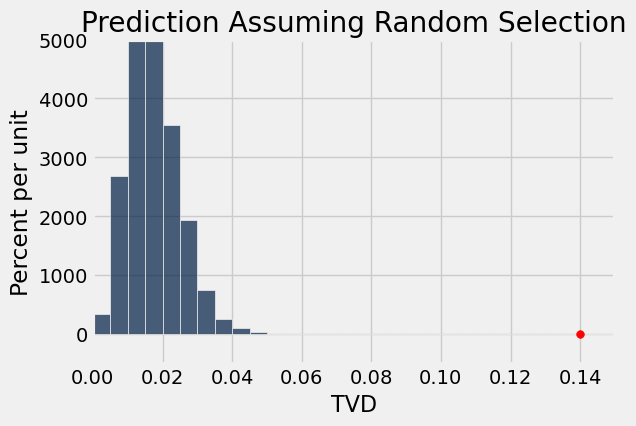

In [133]:
Table().with_column('TVD', tvds).hist(bins=np.arange(0, 0.2, 0.005))

# Plotting parameters; you can ignore this code
plots.title('Prediction Assuming Random Selection')
plots.xlim(0, 0.15)
plots.ylim(-5, 50)
plots.scatter(0.14, 0, color='red', s=30);

# Ejemplo biología.

# Estudio de Caso: Cambios en una Comunidad de Peces y Anfibios

##  Contexto

Los ecólogos realizaron **dos muestreos independientes** en una laguna tropical para evaluar el impacto de una perturbación ambiental (por ejemplo, contaminación agrícola o fragmentación del hábitat) sobre la composición de especies acuáticas.

- En el **primer muestreo (año 1)**, se registraron **1 000 individuos** pertenecientes a cinco especies principales.  
  Estas proporciones representan la **comunidad de referencia** o “natural”.

- En el **segundo muestreo (año 2)**, realizado después del evento de contaminación, se registraron **1 453 individuos**.  
  Aunque el tamaño del muestreo fue distinto, se calcularon **proporciones relativas** para permitir la comparación entre ambas comunidades.


##  Composición de las Comunidades

| Especie | Comunidad natural (antes) | Comunidad afectada (después) |
|:--|:--:|:--:|
| Tilapia azul | 0.15 | 0.26 |
| Mojarra rayada | 0.18 | 0.08 |
| Bagre de canal | 0.54 | 0.54 |
| Rana verde | 0.12 | 0.08 |
| Camarón de agua dulce | 0.01 | 0.04 |

>  *Nota metodológica:*  
> En ecología, los tamaños de muestra pueden variar entre muestreos.  
> Por eso, se trabaja con **frecuencias relativas (proporciones)** en lugar de conteos absolutos.  
> Esto permite comparar la **estructura comunitaria** sin importar el número total de individuos capturados.

---

## Cálculo de la Distancia Total de Variación (TVD)

La **distancia total de variación (TVD)** entre dos comunidades se define como:

\begin{equation}
D_{\text{TVD}}(P, Q) = \frac{1}{2} \sum_{i=1}^{n} |p_i - q_i|
\end{equation}

donde:
- $ P = (p_1, p_2, \dots, p_n) $ son las proporciones de cada especie en la comunidad natural.  
- $ Q = (q_1, q_2, \dots, q_n) $ son las proporciones en la comunidad afectada.  
- $ n $ es el número de especies comparadas.



# Ejemplo en biologia:

Supongamos que queremos comparar la distribución de cuatro especies de plantas en dos diferentes hábitats (por ejemplo, bosque y pradera). Queremos ver si la distribución observada en el segundo hábitat es significativamente diferente de la distribución esperada (que podríamos asumir como la del primer hábitat o como una distribución teórica).

In [24]:
# Crear la tabla de especies usando la librería datascience
species_table = Table().with_columns(
    'Species', ['A', 'B', 'C', 'D'],
    'Forest_Expected', [0.30, 0.40, 0.20, 0.10],
    'Prairie_Observed', [0.29, 0.40, 0.20, 0.50]
)


In [25]:
# Calcular la diferencia y la diferencia absoluta
species_with_diffs = species_table.with_columns(
    'Difference', species_table.column('Prairie_Observed') - species_table.column('Forest_Expected'),
    'Absolute Difference', np.abs(species_table.column('Prairie_Observed') - species_table.column('Forest_Expected'))
)

# Calcular la TVD observada
tvd_observed = 0.5 * np.sum(species_with_diffs.column('Absolute Difference'))
tvd_observed 

0.20500000000000002

Text(0, 0.5, 'Frecuencia')

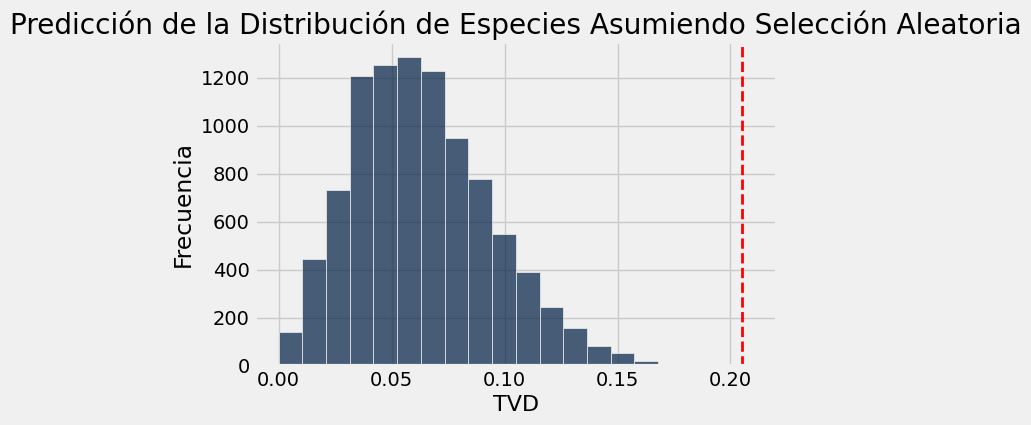

In [26]:
# Función para simular una selección aleatoria
def one_simulated_tvd():
    simulated_counts = np.random.multinomial(100, species_with_diffs.column('Forest_Expected')) / 100
    simulated_diff = np.abs(simulated_counts - species_with_diffs.column('Forest_Expected'))
    return 0.5 * np.sum(simulated_diff)

# Realizar múltiples simulaciones
repetitions = 5000
tvds_simulated = np.array([one_simulated_tvd() for _ in np.arange(repetitions)])

# Visualización del histograma de los TVDs simulados
Table().with_column('Simulated TVDs', tvds_simulated).hist(bins=20)
plots.axvline(tvd_observed, color='red', linestyle='--', linewidth=2, label=f'TVD Observado ({tvd_observed:.3f})')
plots.title('Predicción de la Distribución de Especies Asumiendo Selección Aleatoria')
plots.xlabel('TVD')
plots.ylabel('Frecuencia')


# Simulación sinténtica

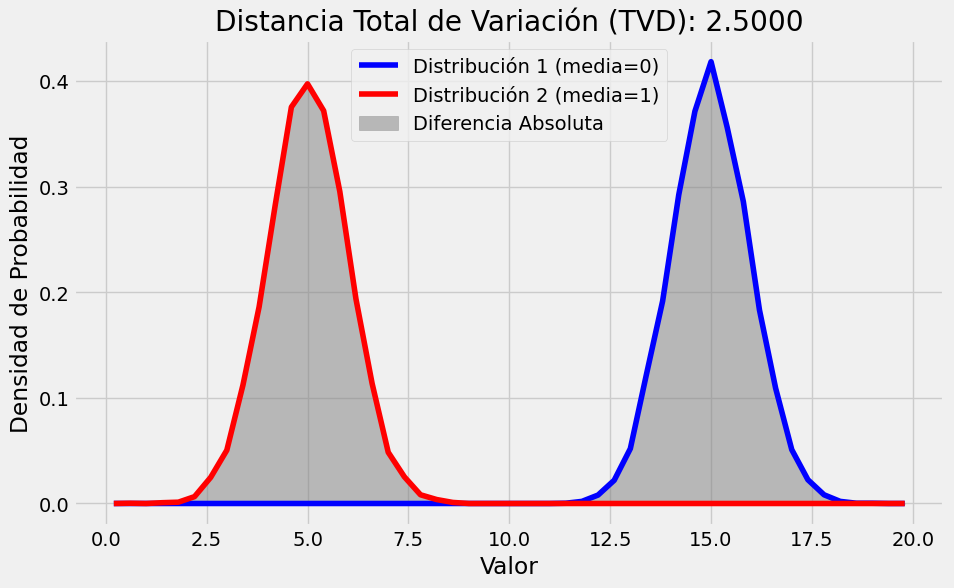

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generar dos distribuciones normales
np.random.seed(0)
dist1 = np.random.normal(loc=15, scale=1, size=10000)  # Distribución normal estándar (media=0, std=1)
dist2 = np.random.normal(loc=5, scale=1, size=10000)  # Distribución normal desplazada (media=1, std=1)

# Crear histogramas para estimar las distribuciones de probabilidad
hist1, bins1 = np.histogram(dist1, bins=50, range=(0, 20), density=True)
hist2, bins2 = np.histogram(dist2, bins=50, range=(0, 20), density=True)

tvd = 0.5 * np.sum(np.abs(hist1 - hist2))

# Visualización de las distribuciones
bin_centers = 0.5 * (bins1[1:] + bins1[:-1])

plt.figure(figsize=(10, 6))
plt.plot(bin_centers, hist1, label='Distribución 1 (media=0)', color='blue')
plt.plot(bin_centers, hist2, label='Distribución 2 (media=1)', color='red')
plt.fill_between(bin_centers, np.abs(hist1 - hist2), color='gray', alpha=0.5, label='Diferencia Absoluta')
plt.title(f'Distancia Total de Variación (TVD): {tvd:.4f}')
plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)